# Hopfield model


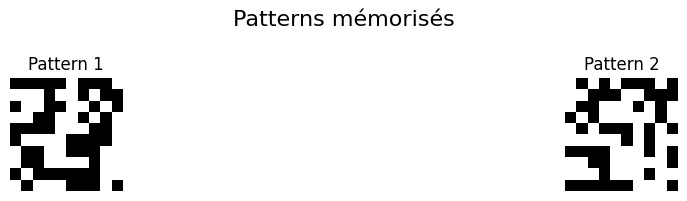

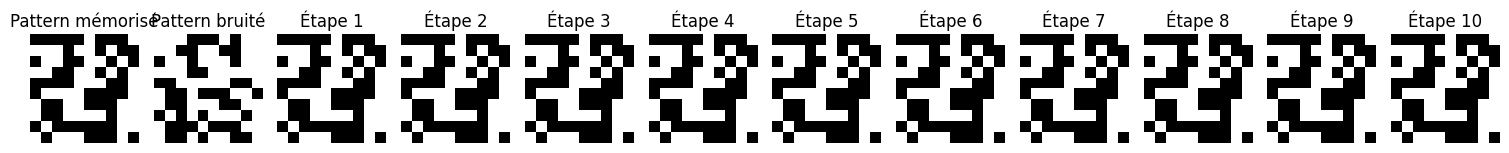

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# ----- Paramètres -----
N = 100              # Nombre de neurones
p = 2                # Nombre de patterns à mémoriser
noise_level = 0.4    # Proportion de bits bruités

# ---- Calcul des dimensions pour le reshape -----
def auto_reshape_dimensions(N):
    """Calcule les dimensions optimales pour le reshape."""
    x = int(np.floor(np.sqrt(N)))
    while N % x != 0:
        x -= 1
    y = N // x
    return (x, y)

reshape_dims = auto_reshape_dimensions(N)

# ----- Création de patterns aléatoires -----
patterns = np.random.choice([-1, 1], size=(p, N))

# ----- Règle de Hebb -----
W = np.zeros((N, N))
for mu in range(p):
    W += np.outer(patterns[mu], patterns[mu])
W /= N
np.fill_diagonal(W, 0)  # Pas de self-connections

# ----- Fonction de mise à jour -----
def update(s, W):
    for i in np.random.permutation(N):  # Màj asynchrone
        s[i] = np.sign(W[i] @ s)
    return s

# ----- Bruit sur un pattern -----
true_pattern = patterns[0]
noisy_pattern = true_pattern.copy()
flip_indices = np.random.choice(N, int(noise_level * N), replace=False)
noisy_pattern[flip_indices] *= -1

# ----- Dynamique -----
steps = 10
history = [noisy_pattern.copy()]
state = noisy_pattern.copy()
for _ in range(steps):
    state = update(state, W)
    history.append(state.copy())

# ----- Affichage des patterns mémorisés -----
fig, axes = plt.subplots(1, p, figsize=(15, 2))
fig.suptitle("Patterns mémorisés", fontsize=16)
for i in range(p):
    ax = axes[i]
    ax.imshow(patterns[i].reshape(reshape_dims), cmap="gray", vmin=-1, vmax=1)
    ax.set_title(f"Pattern {i + 1}")
    ax.axis("off")
plt.tight_layout()
plt.show()

# ----- Affichage de la dynamique -----
fig, axes = plt.subplots(1, steps + 2, figsize=(15, 2))
def show_pattern(ax, pattern, title, dims):
    ax.imshow(pattern.reshape(dims), cmap="gray", vmin=-1, vmax=1)
    ax.set_title(title)
    ax.axis("off")

show_pattern(axes[0], true_pattern, "Pattern mémorisé", reshape_dims)
show_pattern(axes[1], noisy_pattern, "Pattern bruité", reshape_dims)

for t in range(steps):
    show_pattern(axes[t + 2], history[t + 1], f"Étape {t + 1}", reshape_dims)

plt.tight_layout()
plt.show()




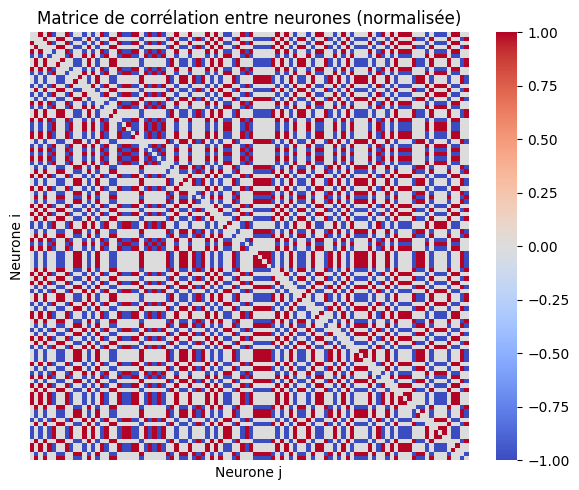

In [2]:
# ----- Matrice de corrélation entre neurones -----
import seaborn as sns

# On peut normaliser W pour obtenir des "corrélations" entre neurones
# (même si ce n’est pas une corrélation statistique au sens strict)
W_corr = W / np.max(np.abs(W))  # Normalisation pour affichage

plt.figure(figsize=(6, 5))
sns.heatmap(W_corr, cmap="coolwarm", center=0, cbar=True,
            xticklabels=False, yticklabels=False)
plt.title("Matrice de corrélation entre neurones (normalisée)")
plt.xlabel("Neurone j")
plt.ylabel("Neurone i")
plt.tight_layout()
plt.show()


# regarder comment le temps de convergence varie 